# Pricing functions

There are different methodologies to estimate the fair value of a token. In this example we demonstrate two different methods: One based on the equation of exchange, and one based on research by Kampakis and Melody, using linear regression on parameters of the token economy.

In [1]:
import numpy as np
import scipy
import os
import sys
tokenlab_path=os.path.abspath("").replace('notebooks','src')
sys.path.insert(0,tokenlab_path)

from TokenLab.simulationcomponents import *
from TokenLab.simulationcomponents.usergrowthclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.tokeneconomyclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.agentpoolclasses import *
from TokenLab.simulationcomponents.pricingclasses import *
from TokenLab.simulationcomponents.addons import AddOn_RandomNoise, AddOn_RandomNoiseProportional
from utils.helpers import *
from matplotlib import pyplot as plt

In [2]:
ITERATIONS=60
HOLDING_TIME=1
SUPPLY=10**7
INITIAL_PRICE=0.5

## Equation of exchange

In [3]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space)
tsm_fiat=TransactionManagement_Stochastic(activity_probs=np.linspace(0.25,1,ITERATIONS),
                                            value_dist_parameters={'loc':1000,'scale':200},
                                           transactions_dist_parameters={'mu':1})

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=tsm_fiat,currency='$')

In [4]:
usm_token=UserGrowth_Spaced(10,5400,ITERATIONS,np.linspace)
ap_token=AgentPool_Basic(users_controller=usm_token,transactions_controller=100,currency='tokenA')

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 28.15it/s]


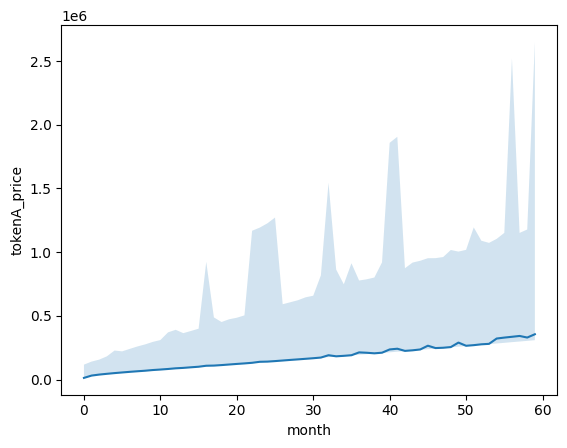

In [5]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat,ap_token])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

## Linear regression model

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 27.07it/s]


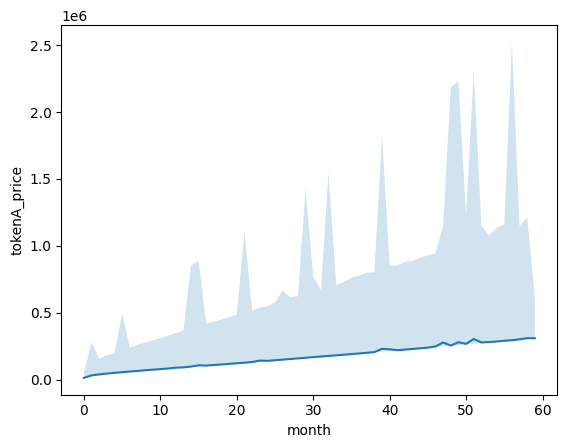

In [6]:
te=TokenEconomy_Basic(holding_time=HOLDING_TIME,supply=SUPPLY,token='tokenA',initial_price=INITIAL_PRICE,
                      price_function=PriceFunction_LinearRegression)

te.add_agent_pools([ap_fiat,ap_token])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot